In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random
%matplotlib inline
from casadi import *
from pdfo import *

In [2]:
n = 500
taux = 1/n

In [3]:
def Katja_Mombaur_DOC ( Xi, Xf, alpha1, alpha2, alpha3):
    xi = Xi[0] 
    yi = Xi[1]
    thetai = Xi[2]
    
    xf = Xf[0] 
    yf = Xf[1]
    thetaf = Xf[2]
    
    opti = casadi.Opti()   

    ## les positions
    x = opti.variable(n)
    y = opti.variable(n)
    theta = opti.variable(n)

    ## les vitesses 
    v1 = opti.variable(n)        ## vitesse latérale
    v2 = opti.variable(n)        ## vitesse orthogonal
    w = opti.variable(n)         ## vitesse angulaire
    
        ## les vitesses 
    u1 = opti.variable(n)        ## accélération latérale
    u3 = opti.variable(n)        ## accélération orthogonal
    u2 = opti.variable(n)        ## accélération angulaire
    
    
    
    opti.minimize(  taux*(alpha1 * dot(u1,u1) + alpha2 * dot(u2,u2 ) + alpha3 * dot( u3 ,u3 ) ) )    # ma fonction objetion

    # mes fonctions de contrainte d'égalité:

    ## pour les condition initial
    opti.subject_to( x[0] == xi + 10**(-4))        
    opti.subject_to( y[0] == yi + 10**(-4))
    opti.subject_to( theta[0] == thetai + 10**(-4))
    
    
    opti.subject_to( v1[0] == 0.0001 )
    opti.subject_to( w[0]  == 0.0001 )
    opti.subject_to( v2[0] == 0.0001 )
    opti.subject_to( v1[-1] == 0.0001 )
    opti.subject_to( w[-1]  == 0.0001 )
    opti.subject_to( v2[-1] == 0.0001 )
    
    opti.subject_to( u1[-1] == 0.0001 )
    opti.subject_to( u2[-1] == 0.0001 )
    opti.subject_to( u3[-1] == 0.0001 )
    opti.subject_to( u1[0] == 0.0001 )
    opti.subject_to( u2[0] == 0.0001 )
    opti.subject_to( u3[0] == 0.0001 )



    ## pour les contraintes d'égaliter
    opti.subject_to( x[1:] + 10**(-4) == x[:n-1]+taux*(cos(theta[:n-1])*v1[:n-1] - sin(theta[:n-1])*v2[:n-1]) )
    opti.subject_to( y[1:] + 10**(-4) == y[:n-1]+taux*(sin(theta[:n-1])*v1[:n-1] + cos(theta[:n-1])*v2[:n-1]) )
    opti.subject_to( theta[1:] + 10**(-4) == theta[:n-1] + taux*w[:n-1] )
    opti.subject_to( (v1[:n-1] + taux* u1[:n-1] == v1[1:] + 10**(-4))  )
    opti.subject_to( (v2[:n-1] + taux* u3[:n-1] == v2[1:] + 10**(-4)) )
    opti.subject_to( (w[:n-1] + taux* u2[:n-1] == w[1:] + 10**(-4)) )
    

    ## pour les conditions finales
    opti.subject_to( x[-1]==xf + 10**(-4))
    opti.subject_to( y[-1]==yf + 10**(-4))
    opti.subject_to( theta[-1]==thetaf + 10**(-4))


    opti.solver('ipopt')      


    sol = opti.solve()
    
    
    X = sol.value(x)
    Y = sol.value(y)
    THETA = sol.value(theta)
    
    V1 = sol.value(v1)
    V2 = sol.value(v2)
    W = sol.value(w)
    
    U1 = sol.value(u1)
    U2 = sol.value(u2)
    U3 = sol.value(u3)
    
    return X,Y,THETA, V1,V2,W, U1,U2,U3

In [4]:
options = {'maxfev': 400  , 'rhoend' : 1e-6}

bounds1 = np.array([[0, 1], [0, 1] , [0, 1]])
lin_con1 = LinearConstraint([1, 1, 1], 1, 1)


def Mombaur (alpha) :
    (alpha1, alpha2, alpha3) = alpha
    print(alpha)
    
    opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

    ## les positions
    x = opti.variable(n)
    y = opti.variable(n)
    theta = opti.variable(n)

    ## les vitesses 
    v1 = opti.variable(n)        ## vitesse latérale
    v2 = opti.variable(n)        ## vitesse orthogonal
    w = opti.variable(n)         ## vitesse angulaire


    ## les accélération 
    u1 = opti.variable(n)        ## accélération latérale
    u3 = opti.variable(n)        ## accélération orthogonal
    u2 = opti.variable(n)        ## accélération angulaire


    opti.minimize(  taux*(alpha1 * dot(u1,u1) + alpha2 * dot(u2,u2 ) + alpha3 * dot( u3 ,u3 ) ) )    # ma fonction objetion

        # mes fonctions de contrainte d'égalité:

        ## pour les condition initial
    opti.subject_to( x[0] == X1[0] + 10**(-4))        
    opti.subject_to( y[0] == X2[0] + 10**(-4))
    opti.subject_to( theta[0] == THETA[0] + 10**(-4))
    
    opti.subject_to( v1[0] == 0.0001 )
    opti.subject_to( w[0]  == 0.0001 )
    opti.subject_to( v2[0] == 0.0001 )
    opti.subject_to( v1[-1] == 0.0001 )
    opti.subject_to( w[-1]  == 0.0001 )
    opti.subject_to( v2[-1] == 0.0001 )
    
    
    
    for j in range (n): 
        opti.subject_to( (u1[j]) <= 20 )
        opti.subject_to( (u1[j]) >= -20 )
        
        opti.subject_to( (u2[j]) <= 20 )
        opti.subject_to( (u2[j]) >= -20 )
        
        opti.subject_to( (u3[j]) <= 20 )
        opti.subject_to( (u3[j]) >= -20 )
        

        
    opti.subject_to( u1[-1] == 0.0001 )
    opti.subject_to( u2[-1] == 0.0001 )
    opti.subject_to( u3[-1] == 0.0001 )

    opti.subject_to( u1[0] == 0.0001 )
    opti.subject_to( u2[0] == 0.0001 )
    opti.subject_to( u3[0] == 0.0001 )



    ## pour les contraintes d'égaliter
    opti.subject_to( x[1:] + 10**(-4) == x[:n-1]+taux*(cos(theta[:n-1])*v1[:n-1] - sin(theta[:n-1])*v2[:n-1]) )
    opti.subject_to( y[1:] + 10**(-4) == y[:n-1]+taux*(sin(theta[:n-1])*v1[:n-1] + cos(theta[:n-1])*v2[:n-1]) )
    opti.subject_to( theta[1:] + 10**(-4) == theta[:n-1] + taux*w[:n-1] )
    opti.subject_to( (v1[:n-1] + taux* u1[:n-1] == v1[1:] + 10**(-4))  )
    opti.subject_to( (v2[:n-1] + taux* u3[:n-1] == v2[1:] + 10**(-4)) )
    opti.subject_to( (w[:n-1] + taux* u2[:n-1] == w[1:] + 10**(-4)) )


        ## pour les conditions finales
    opti.subject_to( x[-1]==X1[-1] + 10**(-4))
    opti.subject_to( y[-1]==X2[-1] + 10**(-4))
    opti.subject_to( theta[-1]==THETA[-1] + 10**(-4))


    opti.solver('ipopt')      # suivant la méthode de KKT

    sol = opti.solve()
    
    X1_1 = sol.value(x)
    X2_1 = sol.value(y)
    X3_1 = sol.value(theta)
    
    m1 = sqrt((np.linalg.norm(X1-X1_1)**2 + np.linalg.norm(X2-X2_1)**2 + np.linalg.norm(THETA-X3_1)**2 )/n)

    
    return  m1   

In [5]:
def DOC_Mombaur_PDFO (alpha1,alpha2,alpha3):
    opti = casadi.Opti()   # cette fonction nous permet de trouver la solution de problème

    ## les positions
    x = opti.variable(n)
    y = opti.variable(n)
    theta = opti.variable(n)

    ## les vitesses 
    v1 = opti.variable(n)        ## vitesse latérale
    v2 = opti.variable(n)        ## vitesse orthogonal
    w = opti.variable(n)         ## vitesse angulaire


    ## les accélération 
    u1 = opti.variable(n)        ## accélération latérale
    u3 = opti.variable(n)        ## accélération orthogonal
    u2 = opti.variable(n)        ## accélération angulaire


    opti.minimize(  taux*(alpha1 * dot(u1,u1) + alpha2 * dot(u2,u2 ) + alpha3 * dot( u3 ,u3 ) ) )    # ma fonction objetion

        # mes fonctions de contrainte d'égalité:

        ## pour les condition initial
    opti.subject_to( x[0] == X1[0] + 10**(-4))        
    opti.subject_to( y[0] == X2[0] + 10**(-4))
    opti.subject_to( theta[0] == THETA[0] + 10**(-4))
    
    opti.subject_to( v1[0] == 0.0001 )
    opti.subject_to( w[0]  == 0.0001 )
    opti.subject_to( v2[0] == 0.0001 )
    opti.subject_to( v1[-1] == 0.0001 )
    opti.subject_to( w[-1]  == 0.0001 )
    opti.subject_to( v2[-1] == 0.0001 )
    
    
    
    for j in range (n): 
        opti.subject_to( (u1[j]) <= 20 )
        opti.subject_to( (u1[j]) >= -20 )
        
        opti.subject_to( (u2[j]) <= 20 )
        opti.subject_to( (u2[j]) >= -20 )
        
        opti.subject_to( (u3[j]) <= 20 )
        opti.subject_to( (u3[j]) >= -20 )
        

        
    opti.subject_to( u1[-1] == 0.0001 )
    opti.subject_to( u2[-1] == 0.0001 )
    opti.subject_to( u3[-1] == 0.0001 )

    opti.subject_to( u1[0] == 0.0001 )
    opti.subject_to( u2[0] == 0.0001 )
    opti.subject_to( u3[0] == 0.0001 )



    ## pour les contraintes d'égaliter
    opti.subject_to( x[1:] + 10**(-4) == x[:n-1]+taux*(cos(theta[:n-1])*v1[:n-1] - sin(theta[:n-1])*v2[:n-1]) )
    opti.subject_to( y[1:] + 10**(-4) == y[:n-1]+taux*(sin(theta[:n-1])*v1[:n-1] + cos(theta[:n-1])*v2[:n-1]) )
    opti.subject_to( theta[1:] + 10**(-4) == theta[:n-1] + taux*w[:n-1] )
    opti.subject_to( (v1[:n-1] + taux* u1[:n-1] == v1[1:] + 10**(-4))  )
    opti.subject_to( (v2[:n-1] + taux* u3[:n-1] == v2[1:] + 10**(-4)) )
    opti.subject_to( (w[:n-1] + taux* u2[:n-1] == w[1:] + 10**(-4)) )


        ## pour les conditions finales
    opti.subject_to( x[-1]==X1[-1] + 10**(-4))
    opti.subject_to( y[-1]==X2[-1] + 10**(-4))
    opti.subject_to( theta[-1]==THETA[-1] + 10**(-4))


    opti.solver('ipopt')      # suivant la méthode de KKT

    sol = opti.solve()
    
    X1_1 = sol.value(x)
    X2_1 = sol.value(y)
    X3_1 = sol.value(theta)
    
    return X1_1, X2_1,X3_1

In [7]:
Xi = [-4,-0.9,pi]
Xf = [0,0,pi/2]
alpha1 = 0.13
alpha2 = 0.72
alpha3 = 0.15

X1,X2,THETA,V1,W,V2,U1,U2,U3 = Katja_Mombaur_DOC ( Xi, Xf, alpha1, alpha2, alpha3)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:    10996
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2997

Total number of variables............................:     4500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality co

In [8]:
res = pdfo( Mombaur, [0.1 ,0.5, 0.4], bounds=bounds1, constraints=[lin_con1], options=options)
alpha1,alpha2,alpha3 = res.x
X1M_PDFO,X2M_PDFO,X3M_PDFO = DOC_Mombaur_PDFO (alpha1,alpha2,alpha3)

[0.1 0.5 0.4]
This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:    10996
Number of nonzeros in inequality constraint Jacobian.:     3000
Number of nonzeros in Lagrangian Hessian.............:     2997

Total number of variables............................:     4500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality constraints...............:     3000
        inequality constraints with only lower bounds:     1500
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1500

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e

[0.1 1.5 0.4]
This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:    10996
Number of nonzeros in inequality constraint Jacobian.:     3000
Number of nonzeros in Lagrangian Hessian.............:     2997

Total number of variables............................:     4500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality constraints...............:     3000
        inequality constraints with only lower bounds:     1500
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1500

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:    10996
Number of nonzeros in inequality constraint Jacobian.:     3000
Number of nonzeros in Lagrangian Hessian.............:     2997

Total number of variables............................:     4500
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     3012
Total number of inequality constraints...............:     3000
        inequality constraints with only lower bounds:     1500
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1500

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

  12 -6.4951385e+01 4.51e-05 1.60e-02  -3.8 4.76e+00  -2.5 1.00e+00 2.73e-01f  1
  13 -7.8306849e+01 4.59e-05 1.99e-02  -3.8 3.08e+01  -3.0 1.00e+00 1.25e-01f  1
  14 -8.2915868e+01 3.84e-05 3.14e-02  -3.8 7.37e+00  -2.6 1.00e+00 1.84e-01f  1
  15 -9.1002860e+01 3.74e-05 2.72e-02  -3.8 5.76e+01  -3.1 6.07e-01 7.14e-02f  1
  16 -9.3645320e+01 3.34e-05 3.99e-02  -3.8 1.02e+01  -2.6 1.00e+00 1.13e-01f  1
  17 -1.0030473e+02 3.28e-05 3.49e-02  -3.8 1.02e+02  -3.1 3.26e-01 4.62e-02f  1
  18 -1.0194329e+02 3.06e-05 4.49e-02  -3.8 1.30e+01  -2.7 1.00e+00 6.90e-02f  1
  19 -1.0862201e+02 3.04e-05 4.24e-02  -3.8 3.15e+02  -3.2 9.96e-02 2.15e-02f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20 -1.0964419e+02 2.92e-05 4.88e-02  -3.8 1.65e+01  -2.7 1.00e+00 3.83e-02f  1
  21 -1.1211722e+02 2.15e-05 3.88e-02  -3.8 4.82e+00  -2.3 1.00e+00 2.73e-01f  1
  22 -1.1448650e+02 1.96e-05 4.55e-02  -3.8 2.08e+01  -2.8 1.00e+00 9.53e-02f  1
  23 -1.1680206e+02 1.43e-05

   5 -6.3351916e+01 1.05e-01 7.43e+00  -1.0 1.77e+01    -  4.24e-01 2.62e-01h  1
   6 -3.6229907e+01 1.04e-02 4.44e+00  -1.0 3.88e+01    -  5.30e-01 9.01e-01h  1
   7 -4.4018705e+01 5.97e-05 1.19e-01  -1.0 7.90e+00    -  8.34e-01 1.00e+00f  1
   8 -5.1667023e+01 5.54e-06 8.33e-03  -1.7 8.33e-01  -2.0 1.00e+00 1.00e+00f  1
   9 -7.4567726e+01 5.33e-05 1.03e-02  -2.5 2.62e+00  -2.5 6.27e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 -9.8433801e+01 6.88e-05 1.14e-02  -3.8 2.08e+01  -3.0 4.46e-01 2.40e-01f  1
  11 -1.0373004e+02 5.71e-05 2.22e-02  -3.8 5.96e+00  -2.5 9.06e-01 1.95e-01f  1
  12 -1.2157170e+02 5.62e-05 2.32e-02  -3.8 5.76e+01  -3.0 5.65e-01 9.83e-02f  1
  13 -1.2611280e+02 4.86e-05 4.00e-02  -3.8 9.31e+00  -2.6 1.00e+00 1.49e-01f  1
  14 -1.4262006e+02 4.69e-05 3.68e-02  -3.8 1.42e+02  -3.1 2.19e-01 4.89e-02f  1
  15 -1.4458792e+02 4.45e-05 4.90e-02  -3.8 1.28e+01  -2.6 1.00e+00 5.43e-02f  1
  16 -1.4860387e+02 2.98e-05

   6  8.1468188e+01 7.17e-03 4.58e+00  -1.0 3.34e+01    -  5.23e-01 9.31e-01h  1
   7  6.6339101e+01 7.46e-05 1.21e-01  -1.0 9.34e+00    -  8.23e-01 1.00e+00f  1
   8  4.7251714e+01 1.19e-04 2.37e-02  -1.7 7.49e+00    -  5.81e-01 1.00e+00f  1
   9  4.0789367e+01 7.92e-05 7.01e-03  -2.5 5.54e+00    -  4.80e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  3.9688854e+01 1.85e-05 1.61e-03  -2.5 2.45e+00    -  8.07e-01 1.00e+00f  1
  11  3.9291713e+01 4.72e-06 8.56e-04  -3.8 2.31e+00    -  7.45e-01 1.00e+00f  1
  12  3.9186729e+01 2.35e-07 1.25e-04  -3.8 8.05e-01    -  8.91e-01 1.00e+00f  1
  13  3.9139375e+01 2.53e-08 2.67e-05  -5.7 6.89e-01    -  9.22e-01 1.00e+00f  1
  14  3.9130375e+01 3.01e-09 1.75e-06  -5.7 4.48e-01    -  9.88e-01 1.00e+00f  1
  15  3.9129312e+01 2.42e-10 3.31e-08  -5.7 2.62e-01    -  1.00e+00 1.00e+00f  1
  16  3.9129034e+01 2.44e-11 1.38e-07  -8.6 1.45e-01    -  9.95e-01 1.00e+00h  1
  17  3.9129020e+01 1.12e-12

  50  1.2547267e+01 9.37e-09 1.91e-03  -5.7 2.89e+01  -4.1 7.47e-01 1.07e-01f  1
  51  1.2545130e+01 3.41e-09 1.43e-03  -5.7 6.53e-01    -  1.00e+00 5.77e-01f  1
  52  1.2544547e+01 3.14e-10 2.69e-06  -5.7 5.87e-02    -  1.00e+00 9.98e-01f  1
  53  1.2543632e+01 7.12e-12 6.36e-09  -8.6 5.56e-02    -  9.98e-01 9.98e-01f  1
  54  1.2543629e+01 1.78e-15 1.42e-14  -9.0 2.29e-04    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 54

                                   (scaled)                 (unscaled)
Objective...............:   1.2543629241153681e+01    1.2543629241153681e+01
Dual infeasibility......:   1.4210854715202004e-14    1.4210854715202004e-14
Constraint violation....:   1.7763568394002505e-15    1.7763568394002505e-15
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   9.0914014946866061e-10    9.0914014946866061e-10
Overall NLP error.......:   9.0914014946866061e-10    9.0914014946866061e-10


Number of objective function 

  13  5.5880663e+01 2.03e-08 9.77e-06  -5.7 4.83e-01    -  9.71e-01 1.00e+00f  1
  14  5.5877725e+01 8.14e-10 6.56e-08  -5.7 2.70e-01    -  1.00e+00 1.00e+00f  1
  15  5.5877466e+01 5.18e-11 3.59e-09  -5.7 1.40e-01    -  1.00e+00 1.00e+00h  1
  16  5.5877228e+01 8.35e-12 1.82e-08  -8.6 7.47e-02    -  9.99e-01 1.00e+00f  1
  17  5.5877224e+01 2.68e-13 1.78e-11  -8.6 3.43e-02    -  1.00e+00 1.00e+00h  1
  18  5.5877224e+01 1.32e-14 8.70e-13  -8.6 1.17e-02    -  1.00e+00 1.00e+00h  1
  19  5.5877224e+01 8.88e-16 2.51e-14  -8.6 1.77e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 19

                                   (scaled)                 (unscaled)
Objective...............:   5.5877223654618462e+01    5.5877223654618462e+01
Dual infeasibility......:   2.5059815333960955e-14    2.5059815333960955e-14
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity........

  11  7.8154997e+01 8.60e-07 1.79e-04  -3.8 7.94e-01    -  9.83e-01 1.00e+00f  1
  12  7.8097324e+01 2.64e-08 5.11e-05  -5.7 4.24e-01    -  9.35e-01 1.00e+00f  1
  13  7.8085577e+01 1.33e-09 2.67e-06  -5.7 2.30e-01    -  9.93e-01 1.00e+00f  1
  14  7.8083829e+01 8.32e-11 4.99e-08  -5.7 1.30e-01    -  1.00e+00 1.00e+00f  1
  15  7.8083650e+01 4.64e-12 2.72e-09  -5.7 6.45e-02    -  1.00e+00 1.00e+00h  1
  16  7.8083513e+01 1.17e-12 8.05e-10  -8.6 3.62e-02    -  1.00e+00 1.00e+00f  1
  17  7.8083509e+01 2.81e-14 1.95e-11  -8.6 1.51e-02    -  1.00e+00 1.00e+00h  1
  18  7.8083509e+01 1.40e-15 6.50e-13  -8.6 3.72e-03    -  1.00e+00 1.00e+00h  1
  19  7.8083509e+01 8.88e-16 1.42e-14  -9.0 2.96e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 19

                                   (scaled)                 (unscaled)
Objective...............:   7.8083508828229654e+01    7.8083508828229654e+01
Dual infeasibility......:   1.4210854715202004e-14    1.4210854715202004e-14
Constraint viol

  12  7.0256474e+01 3.17e-08 4.80e-05  -5.7 4.22e-01    -  9.34e-01 1.00e+00f  1
  13  7.0245335e+01 1.62e-09 2.01e-06  -5.7 2.30e-01    -  9.94e-01 1.00e+00f  1
  14  7.0243686e+01 1.07e-10 4.71e-08  -5.7 1.30e-01    -  1.00e+00 1.00e+00f  1
  15  7.0243520e+01 5.93e-12 2.52e-09  -5.7 6.47e-02    -  1.00e+00 1.00e+00h  1
  16  7.0243384e+01 1.52e-12 8.19e-10  -8.6 3.86e-02    -  1.00e+00 1.00e+00f  1
  17  7.0243381e+01 3.55e-14 1.98e-11  -8.6 1.98e-02    -  1.00e+00 1.00e+00h  1
  18  7.0243380e+01 1.33e-15 1.43e-12  -8.6 9.87e-03    -  1.00e+00 1.00e+00h  1
  19  7.0243380e+01 8.88e-16 1.39e-13  -8.6 4.79e-03    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  7.0243380e+01 8.88e-16 2.84e-14  -9.0 2.31e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 20

                                   (scaled)                 (unscaled)
Objective...............:   7.0243380029794380e+01    7.0243380029794380e+01
Dual infeas

  12  5.2398585e+01 1.08e-07 1.80e-05  -3.8 5.89e-01    -  1.00e+00 1.00e+00f  1
  13  5.2366375e+01 1.73e-08 1.20e-05  -5.7 4.74e-01    -  9.66e-01 1.00e+00f  1
  14  5.2362469e+01 9.55e-10 1.71e-07  -5.7 2.65e-01    -  1.00e+00 1.00e+00f  1
  15  5.2362087e+01 5.88e-11 1.18e-08  -5.7 1.41e-01    -  1.00e+00 1.00e+00h  1
  16  5.2361901e+01 7.87e-12 2.66e-08  -8.6 7.58e-02    -  9.99e-01 1.00e+00f  1
  17  5.2361895e+01 2.94e-13 6.56e-11  -8.6 3.67e-02    -  1.00e+00 1.00e+00h  1
  18  5.2361894e+01 1.70e-14 3.90e-12  -8.6 1.50e-02    -  1.00e+00 1.00e+00h  1
  19  5.2361894e+01 8.88e-16 1.21e-13  -8.6 3.68e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 19

                                   (scaled)                 (unscaled)
Objective...............:   5.2361894268605312e+01    5.2361894268605312e+01
Dual infeasibility......:   1.2079226507921703e-13    1.2079226507921703e-13
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound viol

  13  6.5211633e+01 2.64e-09 5.66e-06  -5.7 2.88e-01    -  9.85e-01 1.00e+00f  1
  14  6.5209795e+01 1.61e-10 6.09e-08  -5.7 1.64e-01    -  1.00e+00 1.00e+00f  1
  15  6.5209573e+01 7.52e-12 4.49e-09  -5.7 8.39e-02    -  1.00e+00 1.00e+00h  1
  16  6.5209434e+01 1.55e-12 2.93e-09  -8.6 4.78e-02    -  1.00e+00 1.00e+00f  1
  17  6.5209428e+01 3.39e-14 3.43e-11  -8.6 2.39e-02    -  1.00e+00 1.00e+00h  1
  18  6.5209427e+01 2.51e-15 1.96e-12  -8.6 1.09e-02    -  1.00e+00 1.00e+00h  1
  19  6.5209427e+01 8.88e-16 9.24e-14  -8.6 3.74e-03    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  6.5209427e+01 8.88e-16 9.09e-15  -9.0 6.60e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 20

                                   (scaled)                 (unscaled)
Objective...............:   6.5209427151308006e+01    6.5209427151308006e+01
Dual infeasibility......:   9.0916857375944460e-15    9.0916857375944460e-15
Constraint viol

  15  6.9611520e+01 4.51e-12 3.25e-09  -5.7 7.09e-02    -  1.00e+00 1.00e+00h  1
  16  6.9611385e+01 1.31e-12 8.47e-10  -8.6 4.11e-02    -  1.00e+00 1.00e+00f  1
  17  6.9611381e+01 2.77e-14 2.29e-11  -8.6 2.02e-02    -  1.00e+00 1.00e+00h  1
  18  6.9611380e+01 1.69e-15 1.35e-12  -8.6 8.49e-03    -  1.00e+00 1.00e+00h  1
  19  6.9611380e+01 8.88e-16 6.04e-14  -8.6 2.30e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 19

                                   (scaled)                 (unscaled)
Objective...............:   6.9611380113454018e+01    6.9611380113454018e+01
Dual infeasibility......:   6.0396132539608516e-14    6.0396132539608516e-14
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   7.4372027596697008e-09    7.4372027596697008e-09
Overall NLP error.......:   7.4372027596697008e-09    7.4372027596697008e-09


Number of objective function 

  18  7.0783438e+01 1.47e-15 9.59e-13  -8.6 6.23e-03    -  1.00e+00 1.00e+00h  1
  19  7.0783438e+01 8.88e-16 2.51e-14  -8.6 9.11e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 19

                                   (scaled)                 (unscaled)
Objective...............:   7.0783438279592062e+01    7.0783438279592062e+01
Dual infeasibility......:   2.5059815333960955e-14    2.5059815333960955e-14
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   3.2792506029849243e-09    3.2792506029849243e-09
Overall NLP error.......:   3.2792506029849243e-09    3.2792506029849243e-09


Number of objective function evaluations             = 20
Number of objective gradient evaluations             = 20
Number of equality constraint evaluations            = 20
Number of inequality constraint evaluations          = 20
Number of equality constraint Jacobian e

  18  7.0084747e+01 2.90e-15 1.33e-12  -8.6 1.02e-02    -  1.00e+00 1.00e+00h  1
  19  7.0084747e+01 8.88e-16 2.03e-13  -8.6 4.26e-03    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  7.0084747e+01 8.88e-16 2.49e-14  -9.0 1.26e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 20

                                   (scaled)                 (unscaled)
Objective...............:   7.0084747353806307e+01    7.0084747353806307e+01
Dual infeasibility......:   2.4868995751603507e-14    2.4868995751603507e-14
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.3805049314498454e-09    2.3805049314498454e-09
Overall NLP error.......:   2.3805049314498454e-09    2.3805049314498454e-09


Number of objective function evaluations             = 21
Number of objective gradient evaluations            

  15  7.0962768e+01 4.32e-12 3.09e-09  -5.7 7.07e-02    -  1.00e+00 1.00e+00h  1
  16  7.0962635e+01 1.19e-12 7.86e-10  -8.6 4.14e-02    -  1.00e+00 1.00e+00f  1
  17  7.0962630e+01 2.59e-14 2.26e-11  -8.6 2.12e-02    -  1.00e+00 1.00e+00h  1
  18  7.0962630e+01 2.29e-15 1.77e-12  -8.6 1.05e-02    -  1.00e+00 1.00e+00h  1
  19  7.0962630e+01 8.88e-16 2.45e-13  -8.6 5.09e-03    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  7.0962630e+01 8.88e-16 6.39e-14  -9.0 2.36e-03    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 20

                                   (scaled)                 (unscaled)
Objective...............:   7.0962629785338095e+01    7.0962629785338095e+01
Dual infeasibility......:   6.3948846218409017e-14    6.3948846218409017e-14
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity........

  11  7.4625053e+01 1.12e-06 1.50e-04  -3.8 7.10e-01    -  9.87e-01 1.00e+00f  1
  12  7.4568477e+01 3.70e-08 3.47e-05  -5.7 4.30e-01    -  9.54e-01 1.00e+00f  1
  13  7.4559078e+01 1.57e-09 4.41e-07  -5.7 2.39e-01    -  1.00e+00 1.00e+00f  1
  14  7.4557796e+01 7.75e-11 3.72e-08  -5.7 1.32e-01    -  1.00e+00 1.00e+00f  1
  15  7.4557640e+01 3.63e-12 2.37e-09  -5.7 6.53e-02    -  1.00e+00 1.00e+00h  1
  16  7.4557510e+01 1.11e-12 6.69e-10  -8.6 3.85e-02    -  1.00e+00 1.00e+00f  1
  17  7.4557506e+01 2.33e-14 1.79e-11  -8.6 1.94e-02    -  1.00e+00 1.00e+00h  1
  18  7.4557506e+01 2.80e-15 9.63e-13  -8.6 9.14e-03    -  1.00e+00 1.00e+00h  1
  19  7.4557506e+01 8.88e-16 1.60e-13  -8.6 3.58e-03    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  7.4557506e+01 8.88e-16 1.42e-14  -9.0 8.85e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 20

                                   (scaled)                 (unscaled)
Objecti

   6  1.0438567e+02 5.65e-03 4.18e+00  -1.0 3.88e+01    -  6.66e-01 9.42e-01h  1
   7  9.1311465e+01 5.29e-05 8.97e-02  -1.0 1.02e+01    -  8.55e-01 1.00e+00f  1
   8  8.3049818e+01 9.44e-05 1.43e-02  -1.7 7.43e+00    -  7.39e-01 1.00e+00f  1
   9  7.9165904e+01 6.39e-05 4.41e-03  -2.5 4.00e+00    -  5.91e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.8172937e+01 8.43e-06 2.32e-04  -2.5 2.48e+00    -  1.00e+00 1.00e+00f  1
  11  7.7940293e+01 1.03e-06 1.17e-04  -3.8 6.23e-01    -  9.90e-01 1.00e+00f  1
  12  7.7885605e+01 3.52e-08 3.51e-05  -5.7 4.10e-01    -  9.54e-01 1.00e+00f  1
  13  7.7876251e+01 1.40e-09 4.50e-07  -5.7 2.27e-01    -  1.00e+00 1.00e+00f  1
  14  7.7874929e+01 6.62e-11 3.63e-08  -5.7 1.25e-01    -  1.00e+00 1.00e+00f  1
  15  7.7874778e+01 3.40e-12 2.12e-09  -5.7 6.16e-02    -  1.00e+00 1.00e+00h  1
  16  7.7874649e+01 1.12e-12 6.36e-10  -8.6 3.66e-02    -  1.00e+00 1.00e+00f  1
  17  7.7874645e+01 2.24e-14

   3  6.7267087e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  7.0042640e+01 1.36e-01 9.42e+00  -1.0 9.95e+01    -  3.71e-01 1.36e-01h  1
   5  7.7632142e+01 9.68e-02 7.04e+00  -1.0 1.79e+01    -  3.82e-01 2.88e-01h  1
   6  1.0320968e+02 6.83e-03 4.09e+00  -1.0 3.96e+01    -  6.71e-01 9.29e-01h  1
   7  9.0676775e+01 5.04e-05 1.01e-01  -1.0 1.06e+01    -  8.56e-01 1.00e+00f  1
   8  8.2294880e+01 9.65e-05 1.50e-02  -1.7 7.33e+00    -  7.38e-01 1.00e+00f  1
   9  7.8328319e+01 6.61e-05 4.50e-03  -2.5 4.04e+00    -  5.89e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7323711e+01 8.55e-06 2.71e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00f  1
  11  7.7086810e+01 1.04e-06 1.25e-04  -3.8 6.25e-01    -  9.88e-01 1.00e+00f  1
  12  7.7031319e+01 3.68e-08 3.24e-05  -5.7 4.20e-01    -  9.57e-01 1.00e+00f  1
  13  7.7022310e+01 1.52e-09 4.08e-07  -5.7 2.33e-01    -  1.00e+00 1.00e+00f  1
  14  7.7021101e+01 7.43e-11

   1  4.5160869e+01 7.67e-01 2.01e+01  -1.0 2.45e+01    -  4.46e-01 8.08e-01h  1
   2  4.9593161e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.8407255e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.70e-02 5.93e-01h  1
   4  7.1253622e+01 1.36e-01 9.42e+00  -1.0 9.88e+01    -  3.72e-01 1.37e-01h  1
   5  7.8995917e+01 9.66e-02 7.02e+00  -1.0 1.79e+01    -  3.80e-01 2.89e-01h  1
   6  1.0420105e+02 7.70e-03 4.03e+00  -1.0 4.02e+01    -  6.76e-01 9.20e-01h  1
   7  9.1861184e+01 4.88e-05 1.14e-01  -1.0 1.10e+01    -  8.56e-01 1.00e+00f  1
   8  8.3527357e+01 9.59e-05 1.56e-02  -1.7 7.18e+00    -  7.40e-01 1.00e+00f  1
   9  7.9630205e+01 6.36e-05 4.48e-03  -2.5 3.99e+00    -  5.94e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.8650010e+01 7.90e-06 2.68e-04  -2.5 2.32e+00    -  1.00e+00 1.00e+00f  1
  11  7.8416621e+01 9.76e-07 1.20e-04  -3.8 6.02e-01    -  9.88e-01 1.00e+00f  1
  12  7.8361339e+01 3.54e-08

   2  4.8593522e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.6990957e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  6.9762726e+01 1.36e-01 9.42e+00  -1.0 9.96e+01    -  3.71e-01 1.36e-01h  1
   5  7.7360675e+01 9.68e-02 7.04e+00  -1.0 1.79e+01    -  3.82e-01 2.88e-01h  1
   6  1.0305260e+02 6.76e-03 4.10e+00  -1.0 3.96e+01    -  6.71e-01 9.30e-01h  1
   7  9.0473376e+01 5.06e-05 1.00e-01  -1.0 1.06e+01    -  8.55e-01 1.00e+00f  1
   8  8.2010101e+01 9.70e-05 1.50e-02  -1.7 7.33e+00    -  7.36e-01 1.00e+00f  1
   9  7.8015588e+01 6.64e-05 4.54e-03  -2.5 4.06e+00    -  5.86e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7010055e+01 8.60e-06 2.76e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00f  1
  11  7.6772632e+01 1.05e-06 1.28e-04  -3.8 6.34e-01    -  9.88e-01 1.00e+00f  1
  12  7.6716946e+01 3.69e-08 3.25e-05  -5.7 4.22e-01    -  9.57e-01 1.00e+00f  1
  13  7.6707925e+01 1.54e-09

   2  4.8655858e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.7061281e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  6.9848139e+01 1.36e-01 9.42e+00  -1.0 9.94e+01    -  3.71e-01 1.36e-01h  1
   5  7.7464132e+01 9.68e-02 7.04e+00  -1.0 1.79e+01    -  3.81e-01 2.88e-01h  1
   6  1.0302016e+02 6.94e-03 4.09e+00  -1.0 3.97e+01    -  6.72e-01 9.28e-01h  1
   7  9.0530355e+01 5.02e-05 1.03e-01  -1.0 1.06e+01    -  8.55e-01 1.00e+00f  1
   8  8.2106095e+01 9.69e-05 1.51e-02  -1.7 7.32e+00    -  7.37e-01 1.00e+00f  1
   9  7.8121018e+01 6.64e-05 4.53e-03  -2.5 4.05e+00    -  5.88e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7115075e+01 8.58e-06 2.77e-04  -2.5 2.41e+00    -  1.00e+00 1.00e+00f  1
  11  7.6877514e+01 1.04e-06 1.26e-04  -3.8 6.29e-01    -  9.88e-01 1.00e+00f  1
  12  7.6821848e+01 3.70e-08 3.23e-05  -5.7 4.22e-01    -  9.58e-01 1.00e+00f  1
  13  7.6812868e+01 1.54e-09

   1  4.4270577e+01 7.67e-01 2.01e+01  -1.0 2.45e+01    -  4.46e-01 8.08e-01h  1
   2  4.8607509e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.7034641e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  6.9800132e+01 1.36e-01 9.42e+00  -1.0 9.96e+01    -  3.71e-01 1.36e-01h  1
   5  7.7386913e+01 9.68e-02 7.04e+00  -1.0 1.79e+01    -  3.82e-01 2.88e-01h  1
   6  1.0310593e+02 6.70e-03 4.10e+00  -1.0 3.95e+01    -  6.71e-01 9.31e-01h  1
   7  9.0501299e+01 5.08e-05 9.92e-02  -1.0 1.05e+01    -  8.55e-01 1.00e+00f  1
   8  8.2043080e+01 9.69e-05 1.49e-02  -1.7 7.34e+00    -  7.36e-01 1.00e+00f  1
   9  7.8052314e+01 6.63e-05 4.54e-03  -2.5 4.05e+00    -  5.86e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7047378e+01 8.59e-06 2.75e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00f  1
  11  7.6810190e+01 1.05e-06 1.27e-04  -3.8 6.33e-01    -  9.88e-01 1.00e+00f  1
  12  7.6754553e+01 3.69e-08

   1  4.4260206e+01 7.67e-01 2.01e+01  -1.0 2.45e+01    -  4.46e-01 8.08e-01h  1
   2  4.8597948e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.7020333e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  6.9784732e+01 1.36e-01 9.42e+00  -1.0 9.96e+01    -  3.71e-01 1.36e-01h  1
   5  7.7370666e+01 9.69e-02 7.04e+00  -1.0 1.79e+01    -  3.82e-01 2.88e-01h  1
   6  1.0310145e+02 6.69e-03 4.10e+00  -1.0 3.95e+01    -  6.71e-01 9.31e-01h  1
   7  9.0490198e+01 5.08e-05 9.90e-02  -1.0 1.05e+01    -  8.55e-01 1.00e+00f  1
   8  8.2026739e+01 9.69e-05 1.49e-02  -1.7 7.34e+00    -  7.36e-01 1.00e+00f  1
   9  7.8034440e+01 6.63e-05 4.54e-03  -2.5 4.06e+00    -  5.86e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7029517e+01 8.60e-06 2.75e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00f  1
  11  7.6792323e+01 1.05e-06 1.27e-04  -3.8 6.34e-01    -  9.88e-01 1.00e+00f  1
  12  7.6736678e+01 3.69e-08

   1  4.4269193e+01 7.67e-01 2.01e+01  -1.0 2.45e+01    -  4.46e-01 8.08e-01h  1
   2  4.8607557e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.7033535e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  6.9798765e+01 1.36e-01 9.42e+00  -1.0 9.96e+01    -  3.71e-01 1.36e-01h  1
   5  7.7386311e+01 9.69e-02 7.04e+00  -1.0 1.79e+01    -  3.82e-01 2.88e-01h  1
   6  1.0311332e+02 6.70e-03 4.10e+00  -1.0 3.95e+01    -  6.71e-01 9.31e-01h  1
   7  9.0503754e+01 5.08e-05 9.91e-02  -1.0 1.05e+01    -  8.55e-01 1.00e+00f  1
   8  8.2041202e+01 9.69e-05 1.49e-02  -1.7 7.34e+00    -  7.36e-01 1.00e+00f  1
   9  7.8049712e+01 6.63e-05 4.54e-03  -2.5 4.06e+00    -  5.86e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7045008e+01 8.59e-06 2.75e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00f  1
  11  7.6807847e+01 1.05e-06 1.27e-04  -3.8 6.34e-01    -  9.88e-01 1.00e+00f  1
  12  7.6752204e+01 3.68e-08

   2  4.8599642e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.7027685e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  6.9790611e+01 1.36e-01 9.42e+00  -1.0 9.97e+01    -  3.71e-01 1.36e-01h  1
   5  7.7374068e+01 9.69e-02 7.04e+00  -1.0 1.79e+01    -  3.82e-01 2.88e-01h  1
   6  1.0311216e+02 6.68e-03 4.10e+00  -1.0 3.95e+01    -  6.71e-01 9.31e-01h  1
   7  9.0494640e+01 5.08e-05 9.88e-02  -1.0 1.05e+01    -  8.55e-01 1.00e+00f  1
   8  8.2031549e+01 9.69e-05 1.49e-02  -1.7 7.34e+00    -  7.36e-01 1.00e+00f  1
   9  7.8039838e+01 6.63e-05 4.54e-03  -2.5 4.06e+00    -  5.86e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7035042e+01 8.59e-06 2.74e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00f  1
  11  7.6797897e+01 1.05e-06 1.27e-04  -3.8 6.34e-01    -  9.88e-01 1.00e+00f  1
  12  7.6742260e+01 3.68e-08 3.26e-05  -5.7 4.21e-01    -  9.57e-01 1.00e+00f  1
  13  7.6733215e+01 1.53e-09

   2  4.8596110e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.7012760e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  6.9778618e+01 1.36e-01 9.42e+00  -1.0 9.96e+01    -  3.71e-01 1.36e-01h  1
   5  7.7367019e+01 9.68e-02 7.04e+00  -1.0 1.79e+01    -  3.82e-01 2.88e-01h  1
   6  1.0309066e+02 6.70e-03 4.10e+00  -1.0 3.95e+01    -  6.71e-01 9.31e-01h  1
   7  9.0485587e+01 5.08e-05 9.92e-02  -1.0 1.05e+01    -  8.55e-01 1.00e+00f  1
   8  8.2021678e+01 9.69e-05 1.49e-02  -1.7 7.34e+00    -  7.36e-01 1.00e+00f  1
   9  7.8028768e+01 6.64e-05 4.54e-03  -2.5 4.06e+00    -  5.86e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7023718e+01 8.60e-06 2.75e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00f  1
  11  7.6786475e+01 1.05e-06 1.27e-04  -3.8 6.34e-01    -  9.88e-01 1.00e+00f  1
  12  7.6730820e+01 3.69e-08 3.26e-05  -5.7 4.22e-01    -  9.57e-01 1.00e+00f  1
  13  7.6721783e+01 1.53e-09

   2  4.8601928e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.7026387e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  6.9791207e+01 1.36e-01 9.42e+00  -1.0 9.96e+01    -  3.71e-01 1.36e-01h  1
   5  7.7377441e+01 9.69e-02 7.04e+00  -1.0 1.79e+01    -  3.82e-01 2.88e-01h  1
   6  1.0310351e+02 6.69e-03 4.10e+00  -1.0 3.95e+01    -  6.71e-01 9.31e-01h  1
   7  9.0494869e+01 5.08e-05 9.91e-02  -1.0 1.05e+01    -  8.55e-01 1.00e+00f  1
   8  8.2033581e+01 9.69e-05 1.49e-02  -1.7 7.34e+00    -  7.36e-01 1.00e+00f  1
   9  7.8041927e+01 6.63e-05 4.54e-03  -2.5 4.06e+00    -  5.86e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7037001e+01 8.59e-06 2.75e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00f  1
  11  7.6799811e+01 1.05e-06 1.27e-04  -3.8 6.34e-01    -  9.88e-01 1.00e+00f  1
  12  7.6744169e+01 3.69e-08 3.26e-05  -5.7 4.21e-01    -  9.57e-01 1.00e+00f  1
  13  7.6735129e+01 1.53e-09

   2  4.8597571e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.7019809e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  6.9784151e+01 1.36e-01 9.42e+00  -1.0 9.96e+01    -  3.71e-01 1.36e-01h  1
   5  7.7370030e+01 9.69e-02 7.04e+00  -1.0 1.79e+01    -  3.82e-01 2.88e-01h  1
   6  1.0310135e+02 6.69e-03 4.10e+00  -1.0 3.95e+01    -  6.71e-01 9.31e-01h  1
   7  9.0489781e+01 5.08e-05 9.90e-02  -1.0 1.05e+01    -  8.55e-01 1.00e+00f  1
   8  8.2026110e+01 9.69e-05 1.49e-02  -1.7 7.34e+00    -  7.36e-01 1.00e+00f  1
   9  7.8033754e+01 6.63e-05 4.54e-03  -2.5 4.06e+00    -  5.86e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7028832e+01 8.60e-06 2.75e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00f  1
  11  7.6791638e+01 1.05e-06 1.27e-04  -3.8 6.34e-01    -  9.88e-01 1.00e+00f  1
  12  7.6735993e+01 3.69e-08 3.26e-05  -5.7 4.21e-01    -  9.57e-01 1.00e+00f  1
  13  7.6726952e+01 1.53e-09

   1  4.4259350e+01 7.67e-01 2.01e+01  -1.0 2.45e+01    -  4.46e-01 8.08e-01h  1
   2  4.8598142e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.7021106e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  6.9785360e+01 1.36e-01 9.42e+00  -1.0 9.96e+01    -  3.71e-01 1.36e-01h  1
   5  7.7371048e+01 9.69e-02 7.04e+00  -1.0 1.79e+01    -  3.82e-01 2.88e-01h  1
   6  1.0310253e+02 6.69e-03 4.10e+00  -1.0 3.95e+01    -  6.71e-01 9.31e-01h  1
   7  9.0490671e+01 5.08e-05 9.90e-02  -1.0 1.05e+01    -  8.55e-01 1.00e+00f  1
   8  8.2027262e+01 9.69e-05 1.49e-02  -1.7 7.34e+00    -  7.36e-01 1.00e+00f  1
   9  7.8035027e+01 6.63e-05 4.54e-03  -2.5 4.06e+00    -  5.86e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7030116e+01 8.60e-06 2.75e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00f  1
  11  7.6792927e+01 1.05e-06 1.27e-04  -3.8 6.34e-01    -  9.88e-01 1.00e+00f  1
  12  7.6737282e+01 3.69e-08

   1  4.4260027e+01 7.67e-01 2.01e+01  -1.0 2.45e+01    -  4.46e-01 8.08e-01h  1
   2  4.8597665e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.7019853e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  6.9784240e+01 1.36e-01 9.42e+00  -1.0 9.96e+01    -  3.71e-01 1.36e-01h  1
   5  7.7370180e+01 9.69e-02 7.04e+00  -1.0 1.79e+01    -  3.82e-01 2.88e-01h  1
   6  1.0310120e+02 6.69e-03 4.10e+00  -1.0 3.95e+01    -  6.71e-01 9.31e-01h  1
   7  9.0489841e+01 5.08e-05 9.90e-02  -1.0 1.05e+01    -  8.55e-01 1.00e+00f  1
   8  8.2026233e+01 9.69e-05 1.49e-02  -1.7 7.34e+00    -  7.36e-01 1.00e+00f  1
   9  7.8033886e+01 6.63e-05 4.54e-03  -2.5 4.06e+00    -  5.86e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7028962e+01 8.60e-06 2.75e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00f  1
  11  7.6791767e+01 1.05e-06 1.27e-04  -3.8 6.34e-01    -  9.88e-01 1.00e+00f  1
  12  7.6736121e+01 3.69e-08

   2  4.8597649e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.7019861e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  6.9784235e+01 1.36e-01 9.42e+00  -1.0 9.96e+01    -  3.71e-01 1.36e-01h  1
   5  7.7370156e+01 9.69e-02 7.04e+00  -1.0 1.79e+01    -  3.82e-01 2.88e-01h  1
   6  1.0310126e+02 6.69e-03 4.10e+00  -1.0 3.95e+01    -  6.71e-01 9.31e-01h  1
   7  9.0489839e+01 5.08e-05 9.90e-02  -1.0 1.05e+01    -  8.55e-01 1.00e+00f  1
   8  8.2026218e+01 9.69e-05 1.49e-02  -1.7 7.34e+00    -  7.36e-01 1.00e+00f  1
   9  7.8033871e+01 6.63e-05 4.54e-03  -2.5 4.06e+00    -  5.86e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7028947e+01 8.60e-06 2.75e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00f  1
  11  7.6791753e+01 1.05e-06 1.27e-04  -3.8 6.34e-01    -  9.88e-01 1.00e+00f  1
  12  7.6736107e+01 3.69e-08 3.26e-05  -5.7 4.21e-01    -  9.57e-01 1.00e+00f  1
  13  7.6727066e+01 1.53e-09

   2  4.8597719e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.7019977e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  6.9784355e+01 1.36e-01 9.42e+00  -1.0 9.96e+01    -  3.71e-01 1.36e-01h  1
   5  7.7370276e+01 9.69e-02 7.04e+00  -1.0 1.79e+01    -  3.82e-01 2.88e-01h  1
   6  1.0310131e+02 6.69e-03 4.10e+00  -1.0 3.95e+01    -  6.71e-01 9.31e-01h  1
   7  9.0489926e+01 5.08e-05 9.90e-02  -1.0 1.05e+01    -  8.55e-01 1.00e+00f  1
   8  8.2026342e+01 9.69e-05 1.49e-02  -1.7 7.34e+00    -  7.36e-01 1.00e+00f  1
   9  7.8034006e+01 6.63e-05 4.54e-03  -2.5 4.06e+00    -  5.86e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7029083e+01 8.60e-06 2.75e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00f  1
  11  7.6791889e+01 1.05e-06 1.27e-04  -3.8 6.34e-01    -  9.88e-01 1.00e+00f  1
  12  7.6736243e+01 3.69e-08 3.26e-05  -5.7 4.21e-01    -  9.57e-01 1.00e+00f  1
  13  7.6727202e+01 1.53e-09

   2  4.8597686e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.7019838e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  6.9784242e+01 1.36e-01 9.42e+00  -1.0 9.96e+01    -  3.71e-01 1.36e-01h  1
   5  7.7370210e+01 9.69e-02 7.04e+00  -1.0 1.79e+01    -  3.82e-01 2.88e-01h  1
   6  1.0310111e+02 6.69e-03 4.10e+00  -1.0 3.95e+01    -  6.71e-01 9.31e-01h  1
   7  9.0489841e+01 5.08e-05 9.90e-02  -1.0 1.05e+01    -  8.55e-01 1.00e+00f  1
   8  8.2026249e+01 9.69e-05 1.49e-02  -1.7 7.34e+00    -  7.36e-01 1.00e+00f  1
   9  7.8033903e+01 6.63e-05 4.54e-03  -2.5 4.06e+00    -  5.86e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7028977e+01 8.60e-06 2.75e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00f  1
  11  7.6791782e+01 1.05e-06 1.27e-04  -3.8 6.34e-01    -  9.88e-01 1.00e+00f  1
  12  7.6736136e+01 3.69e-08 3.26e-05  -5.7 4.21e-01    -  9.57e-01 1.00e+00f  1
  13  7.6727095e+01 1.53e-09

   2  4.8597716e+01 3.87e-01 2.29e+01  -1.0 4.91e+01    -  2.15e-01 4.96e-01h  1
   3  6.7019930e+01 1.57e-01 1.08e+01  -1.0 4.90e+01    -  1.71e-02 5.93e-01h  1
   4  6.9784322e+01 1.36e-01 9.42e+00  -1.0 9.96e+01    -  3.71e-01 1.36e-01h  1
   5  7.7370267e+01 9.69e-02 7.04e+00  -1.0 1.79e+01    -  3.82e-01 2.88e-01h  1
   6  1.0310122e+02 6.69e-03 4.10e+00  -1.0 3.95e+01    -  6.71e-01 9.31e-01h  1
   7  9.0489900e+01 5.08e-05 9.90e-02  -1.0 1.05e+01    -  8.55e-01 1.00e+00f  1
   8  8.2026320e+01 9.69e-05 1.49e-02  -1.7 7.34e+00    -  7.36e-01 1.00e+00f  1
   9  7.8033982e+01 6.63e-05 4.54e-03  -2.5 4.06e+00    -  5.86e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  7.7029057e+01 8.60e-06 2.75e-04  -2.5 2.42e+00    -  1.00e+00 1.00e+00f  1
  11  7.6791862e+01 1.05e-06 1.27e-04  -3.8 6.34e-01    -  9.88e-01 1.00e+00f  1
  12  7.6736216e+01 3.69e-08 3.26e-05  -5.7 4.21e-01    -  9.57e-01 1.00e+00f  1
  13  7.6727176e+01 1.53e-09

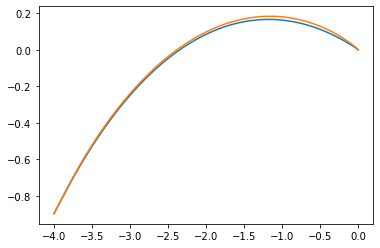

In [9]:
plt.plot(X1,X2)
plt.plot(X1M_PDFO,X2M_PDFO)